In [22]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
# Загрузка данных
# kaggle competitions download -c dl-mfti-2024-classificator

In [23]:
data = pd.read_csv('datasets/fashion-mnist_train.csv')
train_data = data.copy()

In [24]:
train_data_head = train_data.head()
train_data_info = train_data.info()
train_data_missing_values = train_data.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [25]:
# Разделение данных на признаки и метки
X = train_data.iloc[:, 1:].values  # Извлекаем пиксели
y = train_data.iloc[:, 0].values  # Извлекаем метки

# Нормализация данных
X = X / 255.0

# Преобразование меток в one-hot encoding
y = to_categorical(y)

# Изменение формы данных для сети
X = X.reshape(-1, 28, 28, 1)

# Проверка размерности
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (60000, 28, 28, 1)
Shape of y: (60000, 10)


In [26]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и валидационный наборы
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размеров полученных наборов данных
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (48000, 28, 28, 1) (48000, 10)
Validation set shape: (12000, 28, 28, 1) (12000, 10)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6857 - loss: 0.8795 - val_accuracy: 0.8537 - val_loss: 0.4043
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8390 - loss: 0.4499 - val_accuracy: 0.8749 - val_loss: 0.3367
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8622 - loss: 0.3837 - val_accuracy: 0.8862 - val_loss: 0.3084
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8741 - loss: 0.3453 - val_accuracy: 0.8881 - val_loss: 0.2956
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8861 - loss: 0.3168 - val_accuracy: 0.9004 - val_loss: 0.2737
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8940 - loss: 0.2879 - val_accuracy: 0.9055 - val_loss: 0.2621
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9032 - loss: 0.2631 - val_accuracy: 0.9042 - val_loss: 0.2579
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9074 - loss: 0.2560 - val_accuracy: 0

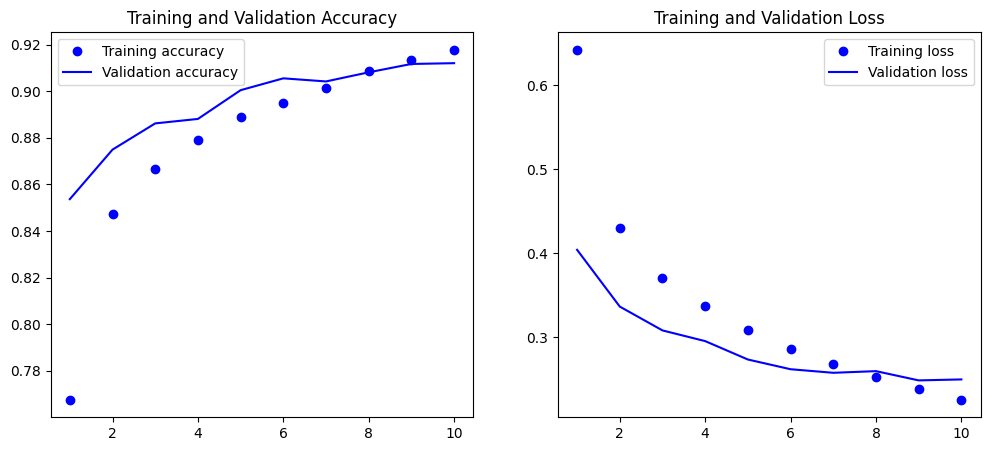

In [29]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [30]:
# Оценка модели на валидационных данных
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {test_acc:.3f}, Validation loss: {test_loss:.3f}")


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9182 - loss: 0.2379
Validation accuracy: 0.912, Validation loss: 0.250


In [31]:
# Загрузка тестовых данных
test_data_orig = pd.read_csv('datasets/fashion-mnist_test.csv')
test_data = test_data_orig.copy()

In [32]:
X_test = test_data.iloc[:, 1:].values
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0  # Нормализация и изменение формы

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)  # Преобразование предсказаний в метки


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [33]:
submission = pd.DataFrame({
    'Id': range(0, len(predicted_labels)),
    'Category': predicted_labels
})

submission.to_csv('final_submission.csv', index=False)

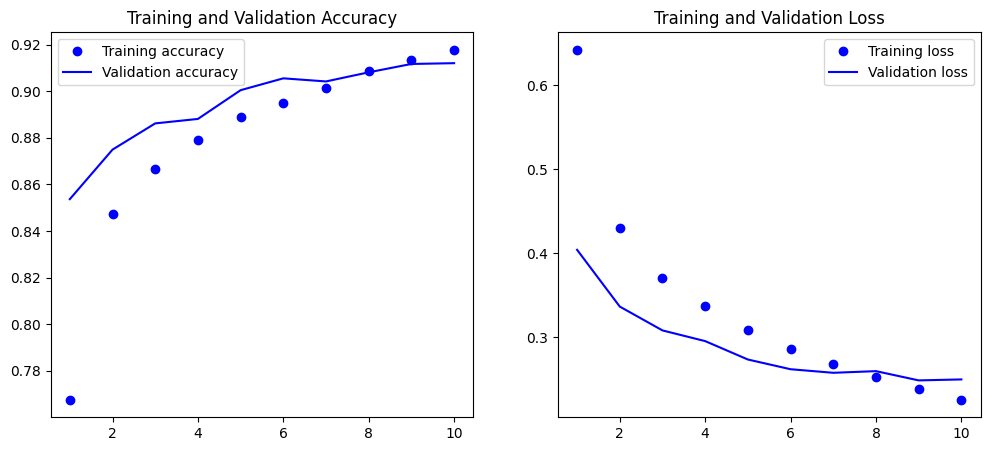

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
